# <span style = "color:green; font-size:40px"> Satellite Image Classification </span>

<b>Satellite image Classification Dataset-RSI-CB256 , This dataset has 4 different classes mixed from Sensors and google map snapshot</b>

The past years have witnessed great progress on remote sensing (RS) image interpretation and its wide applications. With RS images becoming more accessible than ever before, there is an increasing demand for the automatic interpretation of these images.

***

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Read the image file names from all 4 folders (cloudy, desert, water, green_area)

In [2]:
cloudy = glob.glob('Satellite images/cloudy/*.jpg')
desert = glob.glob('Satellite images/desert/*.jpg')
water = glob.glob('Satellite images/water/*.jpg')
green_area = glob.glob('Satellite images/green_area/*.jpg')

### Read the image file into arrays and Store it in a list along with its corresponding label into another list

In [3]:
image = []
label = []

for i in cloudy:
    img=plt.imread(i)
    image.append(img)
    label.append('Cloudy')
    
for i in desert:
    img=plt.imread(i)
    image.append(img)
    label.append('desert')
    
for i in water:
    img=plt.imread(i)
    image.append(img)
    label.append('Water')
    
for i in green_area:
    img=plt.imread(i)
    image.append(img)
    label.append('Green Area')

### Shuffle both image and label list 

In [4]:
image,label  = shuffle(image,label,random_state=100)

### Plot of the images along with its labels

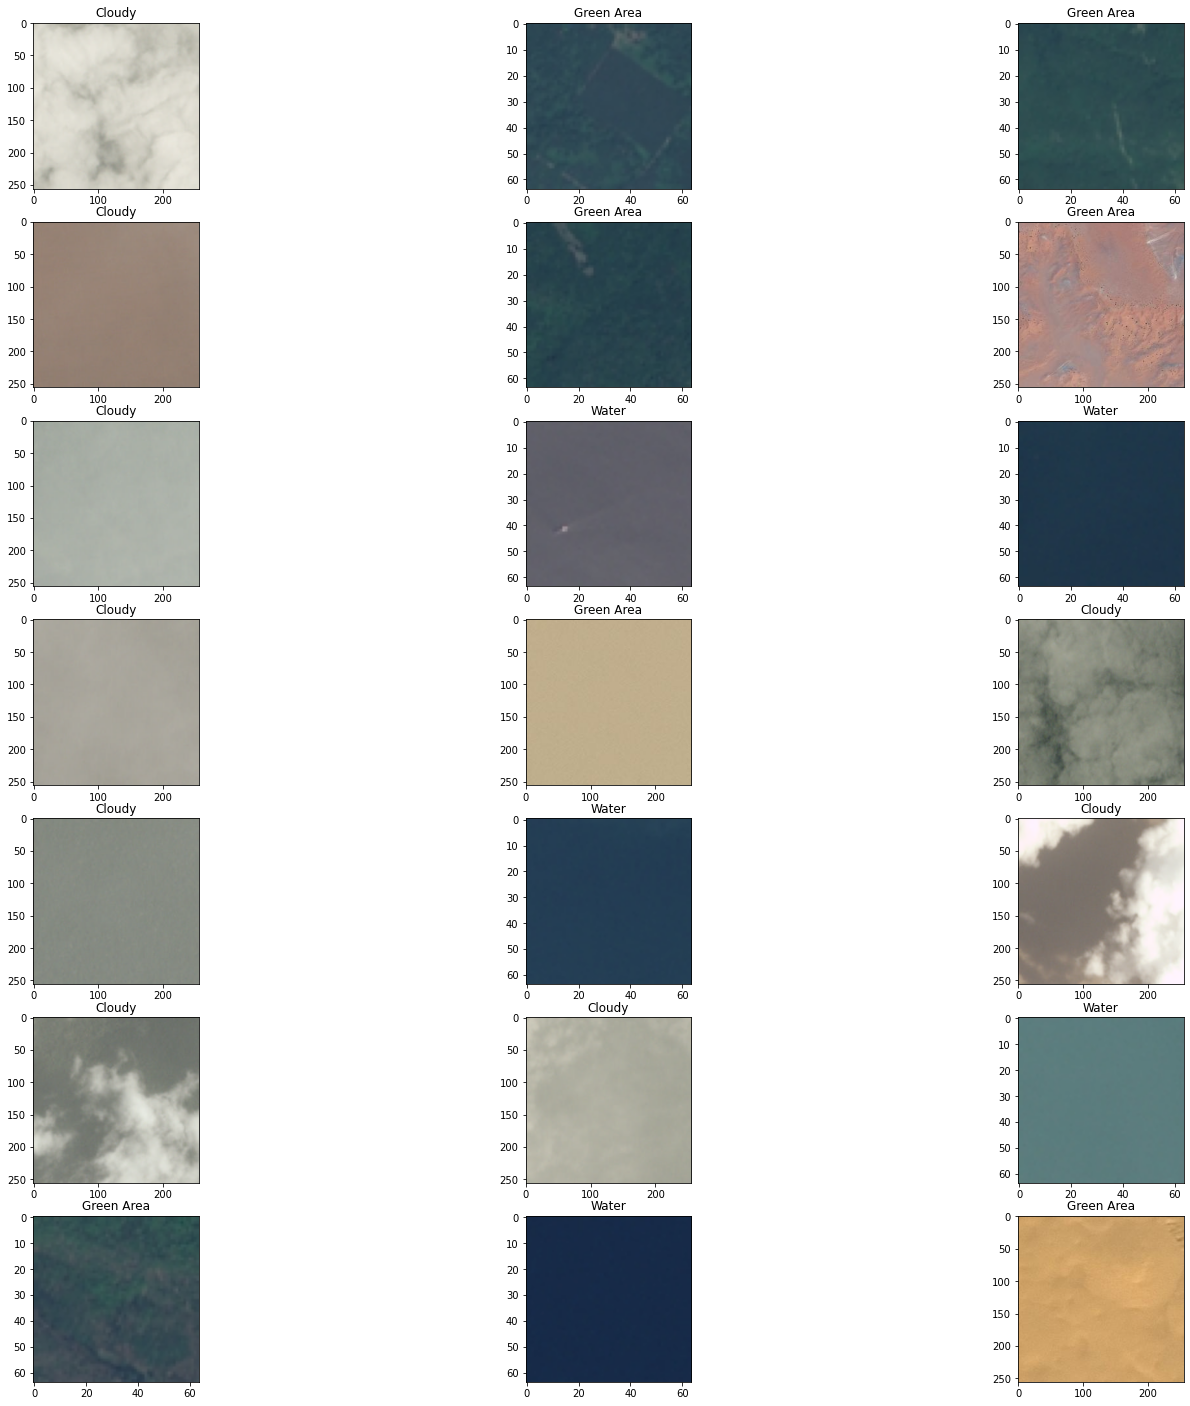

In [5]:
plt.figure(figsize=(25,25))
for i in range(21):
    plt.subplot(7,3,i+1)
    plt.imshow(image[i])
    if label[i]=='Cloudy':
        plt.title("Cloudy")
    elif label[i]=='Desert':
        plt.title("Desert")
    elif label[i]=="Water":
        plt.title("Water")
    else:
        plt.title("Green Area")

### Check the shape of some images

In [6]:
for i in range(10):
    print(image[i].shape)

(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(256, 256, 4)
(64, 64, 3)
(256, 256, 3)
(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(256, 256, 4)


### Resize all images to 64,64,3 and Store it in X Variable

In [7]:
from skimage.transform import resize

In [8]:
x = []

for i in image:
    x.append(resize(i,(64,64,3)))

### Plot some of the images after the resize

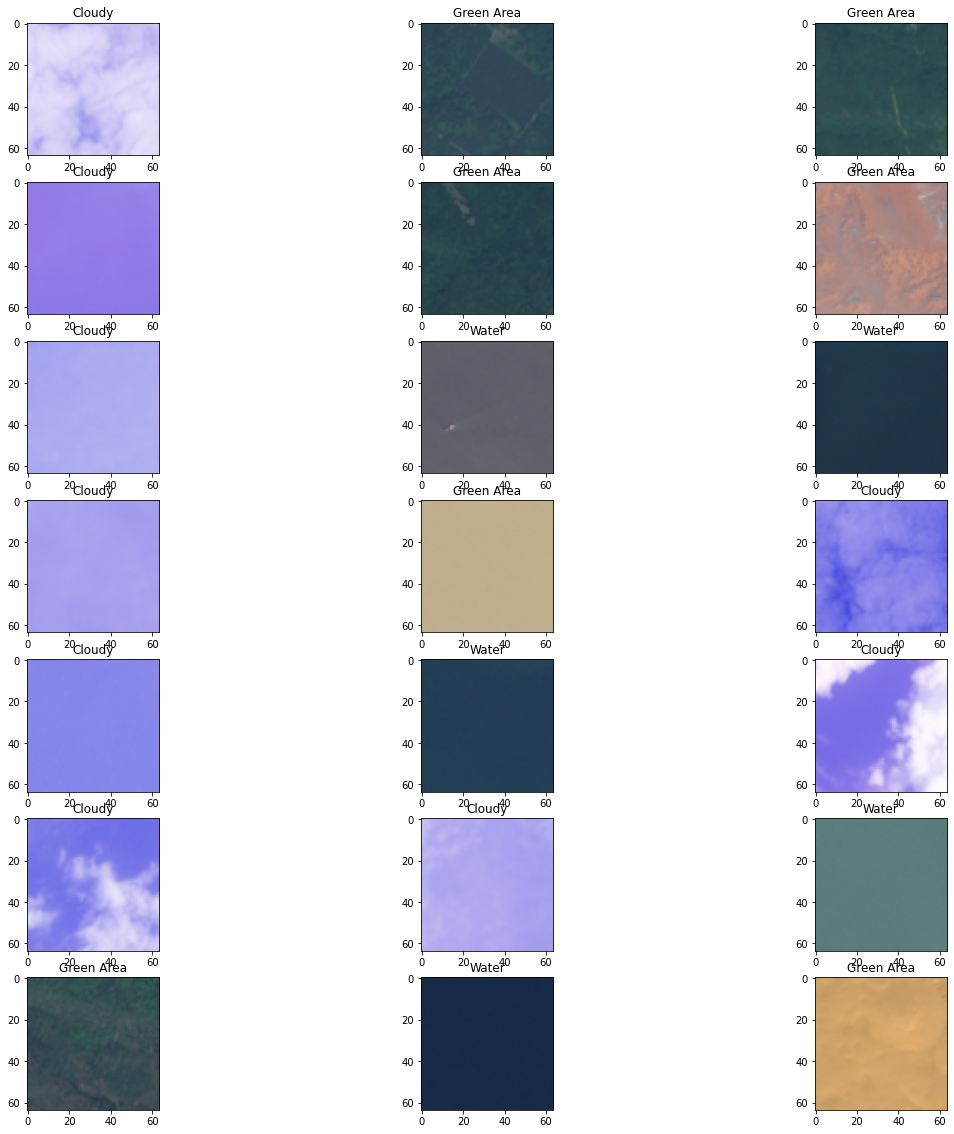

In [9]:
plt.figure(figsize=(20,20))
for i in range(21):
    plt.subplot(7,3,i+1)
    plt.imshow(x[i])
    if label[i]=='Cloudy':
        plt.title("Cloudy")
    elif label[i]=='Desert':
        plt.title("Desert")
    elif label[i]=="Water":
        plt.title("Water")
    else:
        plt.title("Green Area")

### One Hot encode Label

In [10]:
from sklearn.preprocessing import LabelBinarizer

In [11]:
lb = LabelBinarizer()


In [12]:
label_arr = lb.fit_transform(label)

In [13]:
label_arr

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

### Check label classes

In [53]:
labels= lb.classes_

### Convert X to numpy array, Also convert label to a numpy array and store it in y variable

In [15]:
x = np.array(x)
y = np.array(label_arr)

### Split the dataset into Training and Testing set

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2)

### Create a keras Convolutional Neural Network model

In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(4,activation='sigmoid')
    
])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Compile the model

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Train the model

In [19]:
model.fit(xtrain,ytrain,epochs=20,validation_split=.15)

Epoch 1/20
120/120 [==============================] - 3s 21ms/step - loss: 0.4862 - accuracy: 0.7510 - val_loss: 0.2564 - val_accuracy: 0.8861
Epoch 2/20
120/120 [==============================] - 3s 21ms/step - loss: 0.2346 - accuracy: 0.9015 - val_loss: 0.2168 - val_accuracy: 0.9053
Epoch 3/20
120/120 [==============================] - 3s 21ms/step - loss: 0.2253 - accuracy: 0.9062 - val_loss: 0.2212 - val_accuracy: 0.9142
Epoch 4/20
120/120 [==============================] - 3s 21ms/step - loss: 0.1689 - accuracy: 0.9357 - val_loss: 0.1786 - val_accuracy: 0.9157
Epoch 5/20
120/120 [==============================] - 3s 21ms/step - loss: 0.1765 - accuracy: 0.9222 - val_loss: 0.1648 - val_accuracy: 0.9216
Epoch 6/20
120/120 [==============================] - 3s 21ms/step - loss: 0.1446 - accuracy: 0.9389 - val_loss: 0.1246 - val_accuracy: 0.9482
Epoch 7/20
120/120 [==============================] - 3s 22ms/step - loss: 0.1682 - accuracy: 0.9227 - val_loss: 0.1208 - val_accuracy: 0.9497

### Evaluate the model

In [20]:
model.evaluate(xtrain,ytrain)

141/141 [==============================] - 1s 6ms/step - loss: 0.0922 - accuracy: 0.9660


[0.09218286722898483, 0.9660301804542542]

### Make Predictions with X_test

In [21]:
ypred = model.predict(xtest)
ypred

array([[1.9173125e-08, 1.2691373e-17, 3.2086670e-03, 9.9999660e-01],
       [8.6055100e-03, 1.9909263e-02, 9.9950272e-01, 1.0544777e-02],
       [3.8189888e-03, 9.9870467e-01, 8.9780939e-01, 3.7527084e-04],
       ...,
       [1.8245073e-09, 4.4961175e-18, 2.0421743e-03, 9.9999738e-01],
       [9.9986011e-01, 1.9857830e-13, 2.4079204e-02, 4.3878573e-01],
       [1.4039129e-02, 9.9442005e-01, 9.1002536e-01, 1.9794405e-03]],
      dtype=float32)

array([[9.9999523e-01, 7.9669750e-01, 4.3545705e-07, 2.4336934e-02],
       [1.0000000e+00, 9.8528853e-06, 9.9994105e-01, 1.8698573e-03],
       [1.5884760e-01, 2.8833151e-03, 9.9380970e-01, 9.9992764e-01],
       ...,
       [9.7638789e-05, 1.0000000e+00, 9.0533752e-07, 3.4918703e-06],
       [3.7811667e-02, 4.6544343e-02, 9.9982613e-01, 9.9678415e-01],
       [9.2811286e-03, 1.0000000e+00, 3.5302932e-08, 4.2778254e-04]],
      dtype=float32)

### Store the predicted results and y_test in a list in numerical format

#### Actual values

In [24]:
ytest = [np.argmax(i) for i in ytest]

In [25]:
ytest


[3,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 2,
 3,
 1,
 0,
 3,
 2,
 0,
 3,
 2,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 3,
 1,
 0,
 0,
 1,
 1,
 2,
 3,
 3,
 0,
 3,
 2,
 1,
 2,
 0,
 3,
 1,
 3,
 1,
 0,
 0,
 1,
 0,
 2,
 3,
 1,
 2,
 2,
 3,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 3,
 3,
 0,
 2,
 1,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 1,
 3,
 0,
 0,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 0,
 3,
 2,
 2,
 3,
 3,
 3,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 0,
 2,
 2,
 3,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 0,
 2,
 3,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 3,
 1,
 0,
 2,
 1,
 0,
 2,
 3,
 0,
 1,
 1,
 3,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 0,
 3,
 2,
 0,
 2,
 0,
 3,
 1,
 2,
 3,
 0,
 2,
 0,
 1,
 1,
 3,
 2,
 3,
 0,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 0,


[0, 0, 3, 0, 3, 2, 1, 2, 3, 1]

#### Predicted values

In [22]:
ypred = [np.argmax(i) for i in ypred]

In [23]:
ypred

[3,
 2,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 3,
 1,
 0,
 3,
 2,
 0,
 3,
 2,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 3,
 1,
 0,
 0,
 1,
 1,
 2,
 3,
 3,
 0,
 3,
 2,
 1,
 2,
 0,
 3,
 1,
 3,
 1,
 0,
 0,
 1,
 0,
 2,
 3,
 1,
 2,
 2,
 3,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 3,
 3,
 0,
 2,
 1,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 1,
 3,
 0,
 0,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 0,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 0,
 2,
 3,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 3,
 1,
 0,
 2,
 1,
 0,
 2,
 3,
 0,
 1,
 1,
 3,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 0,
 3,
 1,
 0,
 2,
 0,
 3,
 1,
 2,
 3,
 0,
 2,
 0,
 1,
 1,
 3,
 2,
 3,
 0,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 0,


[0, 0, 3, 0, 2, 2, 1, 2, 3, 1]

### Check the accuracy of our prediction

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
accuracy_score(ytest,ypred)

0.9733806566104702

### Plot confusion matrix on a heatmap

<AxesSubplot:>

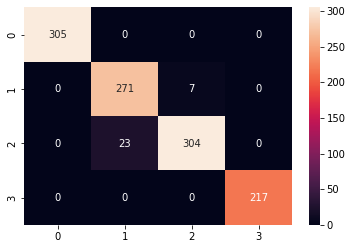

In [30]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='d')

### Find the index position of the images which are wrongly classified

In [34]:
indexes = []

for i in range(len(ytest)):
    if ytest[i] != ypred[i]:
        indexes.append(i)

In [35]:
indexes

[5,
 62,
 79,
 105,
 127,
 128,
 165,
 201,
 216,
 255,
 280,
 499,
 522,
 527,
 568,
 571,
 597,
 634,
 665,
 689,
 690,
 713,
 722,
 806,
 906,
 938,
 1051,
 1091,
 1109,
 1126]

### Find the number of images which are wrongly classified

In [36]:
len(indexes)

30

### Plot some of the images which are wrongly classified along with its Original and Predicted label

In [52]:
label

['Cloudy',
 'Green Area',
 'Green Area',
 'Cloudy',
 'Green Area',
 'desert',
 'Cloudy',
 'Water',
 'Water',
 'Cloudy',
 'desert',
 'Cloudy',
 'Cloudy',
 'Water',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Water',
 'Green Area',
 'Water',
 'desert',
 'Green Area',
 'Water',
 'Water',
 'Cloudy',
 'Green Area',
 'desert',
 'Water',
 'Green Area',
 'Green Area',
 'Cloudy',
 'Cloudy',
 'Water',
 'Green Area',
 'Water',
 'desert',
 'Cloudy',
 'Green Area',
 'Water',
 'Water',
 'Cloudy',
 'desert',
 'desert',
 'desert',
 'Water',
 'Green Area',
 'desert',
 'Water',
 'desert',
 'desert',
 'Green Area',
 'Cloudy',
 'Green Area',
 'Cloudy',
 'Green Area',
 'Cloudy',
 'Green Area',
 'Green Area',
 'desert',
 'Water',
 'Cloudy',
 'Cloudy',
 'Water',
 'Green Area',
 'Water',
 'desert',
 'Cloudy',
 'desert',
 'Cloudy',
 'Green Area',
 'desert',
 'Green Area',
 'Water',
 'desert',
 'desert',
 'Green Area',
 'Green Area',
 'Cloudy',
 'Green Area',
 'Water',
 'desert',
 'desert',
 'Water',
 'Cloudy',
 'Cloudy

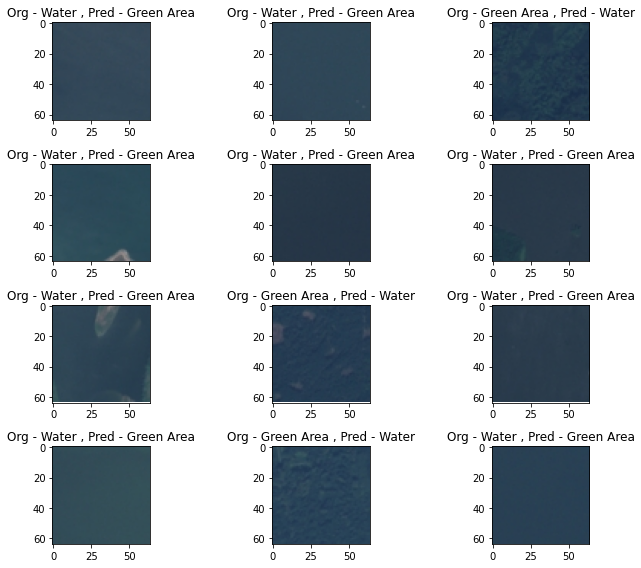

In [54]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(xtest[indexes[i]])
    plt.title(f"Org - {labels[ytest[indexes[i]]]} , Pred - {labels[ypred[indexes[i]]]}")
plt.tight_layout()

### Print classification report

In [55]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       0.92      0.97      0.95       278
           2       0.98      0.93      0.95       327
           3       1.00      1.00      1.00       217

    accuracy                           0.97      1127
   macro avg       0.97      0.98      0.98      1127
weighted avg       0.97      0.97      0.97      1127



***